<a href="https://colab.research.google.com/github/Pasindusameera/Deep_learning_Basics/blob/main/save_and_load_tf_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
X = tf.range(0, 100, 2)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [3]:
y = 2*X + 3
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199], dtype=int32)>

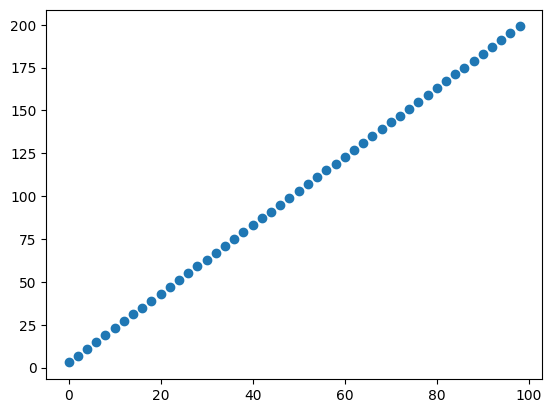

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

### Model Building

In [5]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(0.01),
             metrics = ['mae'])

# train the model
model.fit(X, y, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 17ms/step - loss: 78.8804 - mae: 78.8804
Epoch 2/50
2/2 [==============================] - 0s 11ms/step - loss: 70.8322 - mae: 70.8322
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 62.4602 - mae: 62.4602
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 54.5333 - mae: 54.5333
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 46.6047 - mae: 46.6047
Epoch 6/50
2/2 [==============================] - 0s 11ms/step - loss: 37.7762 - mae: 37.7762
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 29.3870 - mae: 29.3870
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 20.6142 - mae: 20.6142
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 11.4656 - mae: 11.4656
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 3.0806 - mae: 3.0806
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - lo

In [6]:
X_val = 150
2*X_val + 3

303

In [7]:
X_val = -10
2*X_val + 3

-17

In [8]:
model.predict([150, -10])

1/1 [==============================] - 0s 141ms/step


array([[302.5787  ],
       [-17.649757]], dtype=float32)

### Save model using SavedModel format

In [9]:
model.save("new_model_1")

### Save model using HDF5 format

In [10]:
model.save("new_model_2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using SavedModel format

In [12]:
import tensorflow as tf
new_model_1 = tf.keras.models.load_model('new_model_1')
new_model_1.predict([150, -10])

1/1 [==============================] - 0s 124ms/step


array([[302.5787  ],
       [-17.649757]], dtype=float32)

In [15]:
new_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Using HDF5 format

In [16]:
import tensorflow as tf
new_model_2 = tf.keras.models.load_model('new_model_2.h5')
new_model_2.predict([150, -10])

1/1 [==============================] - 0s 78ms/step


array([[302.5787  ],
       [-17.649757]], dtype=float32)

In [17]:
new_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
